In [ ]:
import numpy as np
import h5py
import torch
from torch.utils.data import TensorDataset
from globals import DATA
from utils import change_to_working_directory
import matplotlib.pyplot as plt

In [ ]:
file_path = "G:/PycharmProjects/APS360Project/data/Part_1.mat"

with h5py.File(file_path, "r") as hdf_file:
    # List all the top-level keys (datasets, groups) in the HDF5 file
    ref_key = list(hdf_file.keys())[0]
    value_key = list(hdf_file.keys())[1]

    data = hdf_file[value_key]
    data = data[:10,0]

    numpy_data = []

    for i in range(data.shape[0]):
        person = data[i]
        obj = hdf_file[person]
        obj = obj[:]

        if obj.shape[0] > 60000:
            subject = obj
            break

In [ ]:
subject.shape

(61000, 3)

In [ ]:
#import autoregression
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
subject_abp = subject[:,1 ]
train, test = subject_abp[1:1000], subject_abp[1000:10000]
model = AutoReg(train, lags=100)
model_fit = model.fit()
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

Text(0.5, 1.0, '4000-5000')

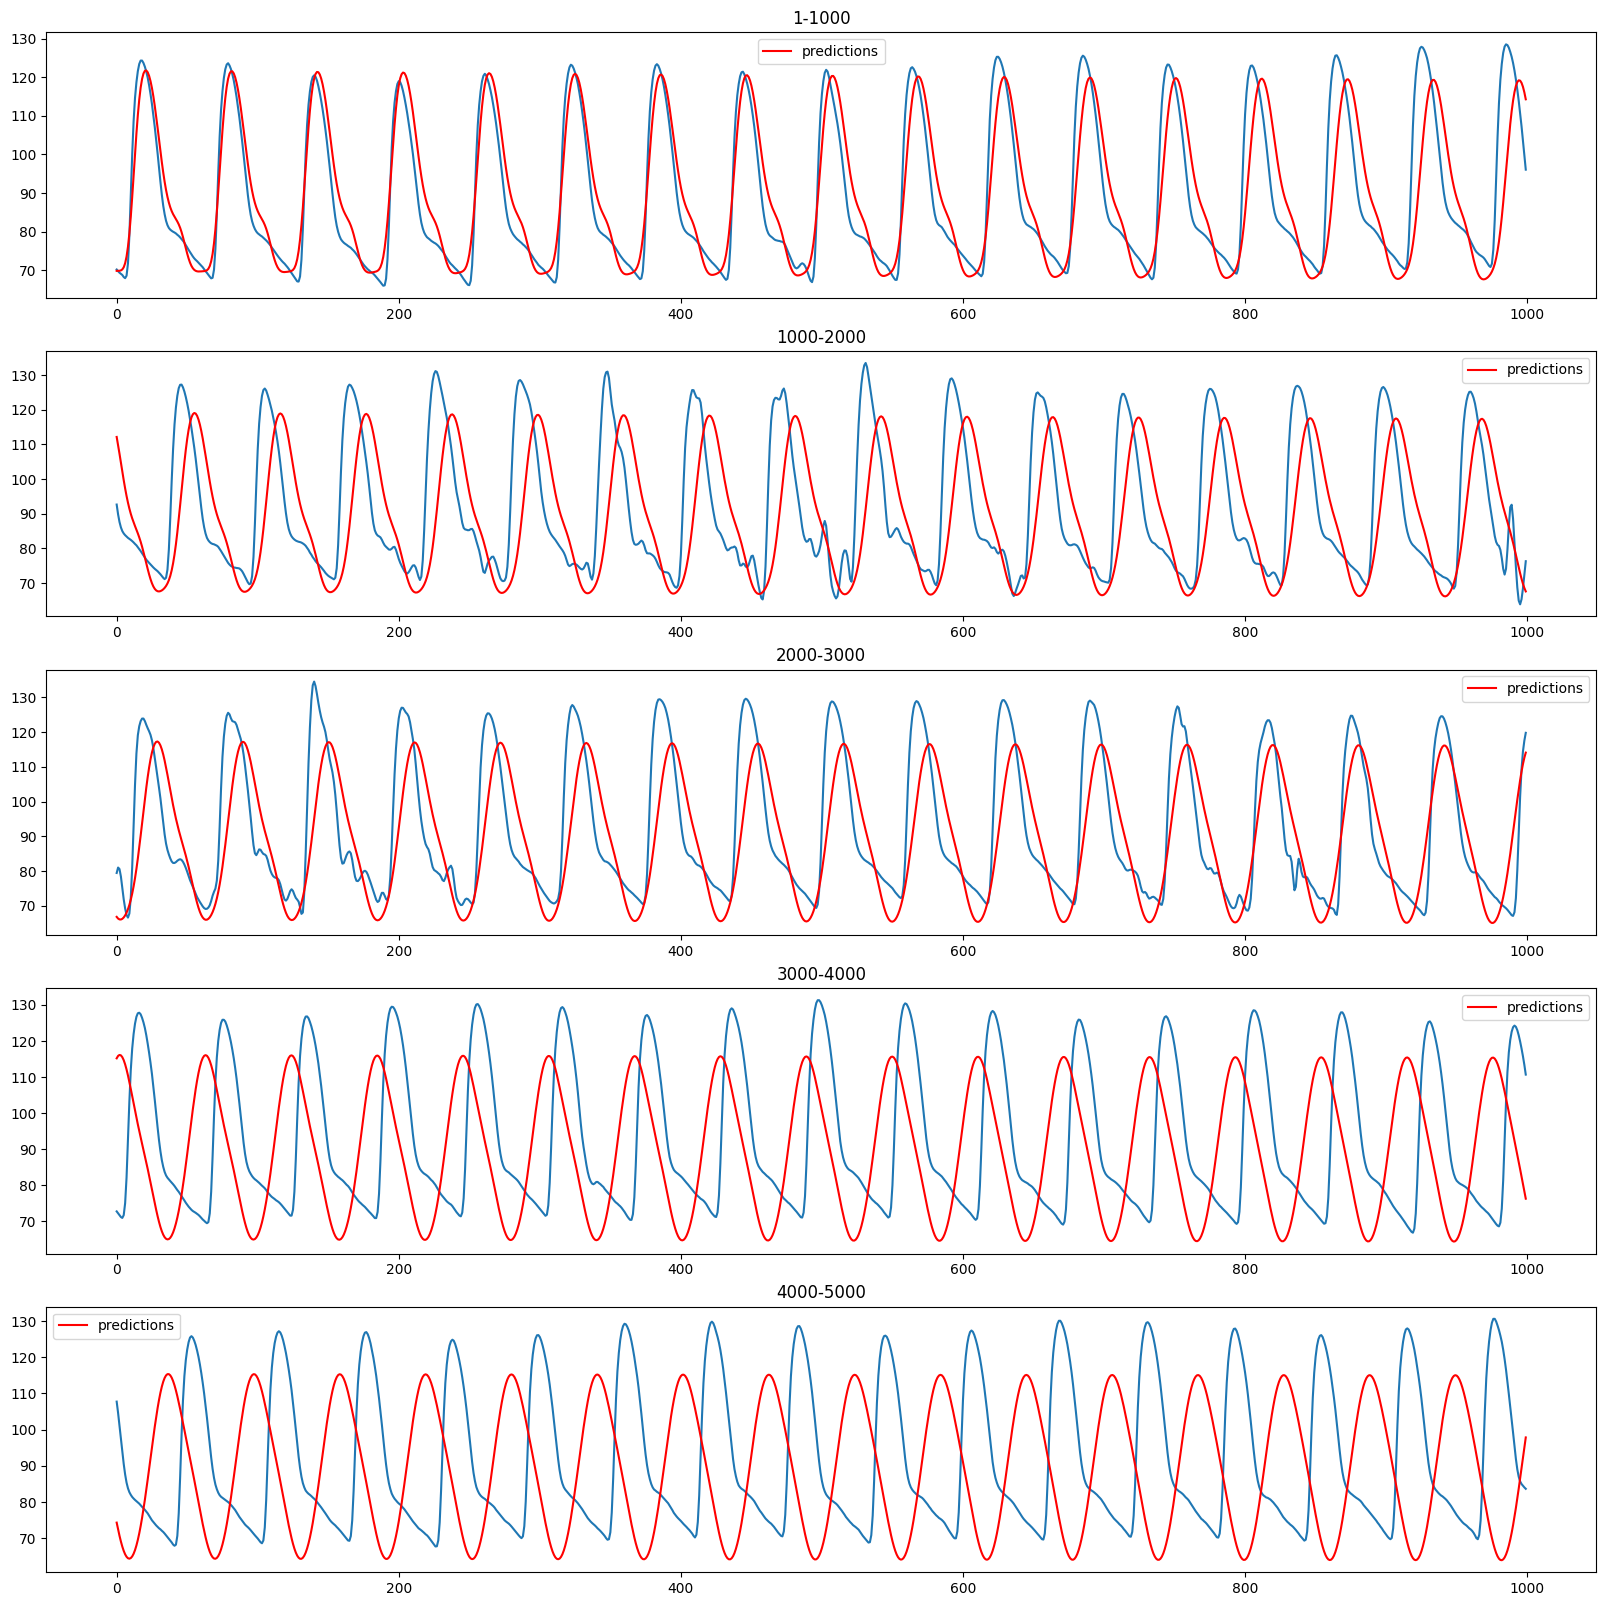

In [ ]:
#adjust figure size
plt.rcParams['figure.figsize'] = [20, 20]

plt.subplot(5,1,1)
plt.plot(test[1000:2000])
plt.plot(predictions[1000:2000], label='predictions', color='red')
plt.title('1-1000')
plt.legend()

plt.subplot(5,1,2)
plt.plot(test[2000:3000])
plt.plot(predictions[2000:3000], label='predictions',color='red')
plt.legend()
plt.title('1000-2000')


plt.subplot(5,1,3)
plt.plot(test[3000:4000])
plt.plot(predictions[3000:4000], label='predictions',color='red')
plt.legend()
plt.title('2000-3000')

plt.subplot(5,1,4)
plt.plot(test[4000:5000])
plt.plot(predictions[4000:5000], label='predictions',color='red')
plt.legend()
plt.title('3000-4000')

plt.subplot(5,1,5)
plt.plot(test[5000:6000])
plt.plot(predictions[5000:6000], label='predictions',color='red')
plt.legend()
plt.title('4000-5000')
